<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement

Standardized testing remains a topic of controversy today. One of the arguments against requiring standardized test scores in college admissions is that students from wealthier backgrounds can afford better test prep and thus achieve higher scores on them. These tests may thus be seen as discerning family wealth rather than aptitude. 

The College Board has tasked its data science department to generate insights and recommendations. This project aims to explore trends between family income levels and standardized test scores at an inter-state level to enable colleges to make better informed decisions on whether to use these test scores as part of their admissions criteria as well as for state officials.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

SAT total score has a range of 400-1600.
ACT composite score has a range of 1-36.

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Data

Datasets Used:
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT participation rates and composite scores by state
* [`sat_2019.csv`](./data/sat_2019.csv): SAT participation rates and scores by state
* [`us_income_2019.csv`](./data/us_income_2019.csv): 2019 median household/family/per capita income by state extracted from US census 2020 data; source https://data.census.gov/

### Outside Research

Back in 2013, the college board's own data showed that SAT scores are highly correlated with income, with those from families earning more than \\$200,000 a year averaging almost 400 points higher than students from familes earning under \\$20,000 a year. The writing test had the biggest gap and was dropped during the SAT overhaul in 2014 ([*source*](https://archive.ph/NqLrh),
[*additional information*](https://secure-media.collegeboard.org/digitalServices/pdf/research/2013/TotalGroup-2013.pdf)).
A relatively recent study in 2021 about college admissions tests revealed that the SAT and ACT tests discriminate against low-income students in terms of college admissions at selective colleges. The forbes article that summarized the study highlighted a key finding that "students with family income of \\$100,000 or more are more than twice as likely as students with family income under \\$50,000 to have combined SAT test scores of 1400 to 1600".[*source*](https://www.forbes.com/sites/markkantrowitz/2021/05/21/how-admissions-tests-discriminate-against-low-income-and-minority-student-admissions-at-selective-colleges/?sh=979aa733cc1c)

## Import Libraries

In [1]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Processing Functions

In [2]:
def mean_calc(arr):
    mean = sum(arr) / len(arr)
    return mean

In [3]:
# standard deviation function
def std_dev(arr):
    mean = mean_calc(arr)  # Find the mean
    # Subtract the mean from each element, square each result, and take their sum
    var = 0
    for i in arr:
        var += (i - mean)**2
    var = var / len(arr)  # Compute variance
    sd = var**0.5  # sd = sqrt variance
    return(sd)

test = [1,2,3,4,5,6,7,8,9] # SD should be 2.6
print(std_dev(test))

2.581988897471611


In [4]:
# function to convert percentage into decimals
def percent_to_decimal(number):
    try:
        number = float(number.strip("%")) / 100 # Strip '%', divide by 100, and convert to float
        return number
    except:
        return np.nan

percent_to_decimal('66%')

0.66

### Data Import

In [5]:
# import the datasets:
act_2019 = pd.read_csv('data/act_2019.csv')
sat_2019 = pd.read_csv('data/sat_2019.csv')
income_2019 = pd.read_csv('data/us_income_2019.csv')

In [6]:
# display the data
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [7]:
# check for missing values
act_2019.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [8]:
# check for missing values and display data type
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [9]:
# use df.map to convert % strings to float
act_2019['Participation'] = act_2019['Participation'].map(percent_to_decimal)

In [10]:
# check dtype of converted column
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   Composite      52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [11]:
# check if values are within expected range
print(f"lowest ACT composite score is {act_2019['Composite'].min()}, highest ACT composite score is {act_2019['Composite'].max()}")
print(f"lowest ACT participation rate is {act_2019['Participation'].min()}, highest ACT participation rate is {act_2019['Participation'].max()}")

lowest ACT composite score is 17.9, highest ACT composite score is 25.5
lowest ACT participation rate is 0.06, highest ACT participation rate is 1.0


In [12]:
# rename columns
act_2019.rename(columns={
    'State': 'state',
    'Participation': 'act_participation',
    'Composite': 'act_composite_score'
}, inplace=True)

In [13]:
act_2019.head()

,state,act_participation,act_composite_score
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


In [14]:
# display the data
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [15]:
# check for missing values
sat_2019.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [16]:
# display info
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [17]:
sat_2019

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999


In [18]:
# convert %strings to float; function will replace '—' with np.nan
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].map(percent_to_decimal)

In [19]:
# check dtype of converted column
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               53 non-null     object 
 1   Participation Rate  51 non-null     float64
 2   EBRW                53 non-null     int64  
 3   Math                53 non-null     int64  
 4   Total               53 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ KB


In [20]:
# check if values are within expected range
print(f"lowest SAT participation rate is {sat_2019['Participation Rate'].min()}, highest SAT particpation rate is {sat_2019['Participation Rate'].max()}")
print(f"lowest SAT total score is {sat_2019['Total'].min()}, highest SAT total score is {sat_2019['Total'].max()}")

lowest SAT participation rate is 0.02, highest SAT particpation rate is 1.0
lowest SAT total score is 935, highest SAT total score is 1284


In [21]:
# rename columns
sat_2019.rename(columns={
    'State': 'state',
    'Participation Rate': 'sat_participation',
    'EBRW': 'sat_ebrw',
    'Math': 'sat_math',
    'Total': 'sat_total_score'
}, inplace=True)

In [22]:
sat_2019.head()

,state,sat_participation,sat_ebrw,sat_math,sat_total_score
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [23]:
# display the data
income_2019.head()

,State,Median household income (dollars),Median family income (dollars),Per capita income (dollars)
0,Alabama,"50,536","64,430","27,928"
1,Alaska,"77,640","92,588","36,787"
2,Arizona,"58,945","70,184","30,694"
3,Arkansas,"47,597","59,455","26,577"
4,California,"75,235","85,837","36,955"


In [24]:
# find if any null values
income_2019.isnull().sum()

State                                0
Median household income (dollars)    0
Median family income (dollars)       0
Per capita income (dollars)          0
dtype: int64

In [25]:
# check dtype and missing values
income_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   State                              52 non-null     object
 1   Median household income (dollars)  52 non-null     object
 2   Median family income (dollars)     52 non-null     object
 3   Per capita income (dollars)        52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [26]:
# remove commas from data and convert to int
def str_to_int(value):
    try:
        value = int(value.replace(',',""))
        return value
    except:
        return value

income_2019['Median household income (dollars)'] = income_2019['Median household income (dollars)'].map(str_to_int)
income_2019['Median family income (dollars)'] = income_2019['Median family income (dollars)'].map(str_to_int)
income_2019['Per capita income (dollars)'] = income_2019['Per capita income (dollars)'].map(str_to_int)

In [27]:
income_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   State                              52 non-null     object
 1   Median household income (dollars)  52 non-null     int64 
 2   Median family income (dollars)     52 non-null     int64 
 3   Per capita income (dollars)        52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [28]:
# rename columns
income_2019.rename(columns={
    'State': 'state',
    'Median household income (dollars)': 'median_household_income',
    'Median family income (dollars)': 'median_family_income',
    'Per capita income (dollars)': 'per_capita_income'
}, inplace=True)

In [29]:
income_2019.head()

,state,median_household_income,median_family_income,per_capita_income
0,Alabama,50536,64430,27928
1,Alaska,77640,92588,36787
2,Arizona,58945,70184,30694
3,Arkansas,47597,59455,26577
4,California,75235,85837,36955


In [30]:
# merge the datasets based on US census states
# inner join used to only include US census states and remove states with missing values

merged = pd.merge(income_2019, act_2019, on='state', how='inner')
merged = pd.merge(merged, sat_2019, on='state', how='inner')

In [31]:
merged.drop('median_household_income', axis = 1, inplace = True)

In [32]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   median_family_income  51 non-null     int64  
 2   per_capita_income     51 non-null     int64  
 3   act_participation     51 non-null     float64
 4   act_composite_score   51 non-null     float64
 5   sat_participation     51 non-null     float64
 6   sat_ebrw              51 non-null     int64  
 7   sat_math              51 non-null     int64  
 8   sat_total_score       51 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 4.0+ KB


In [33]:
# Save cleaned and merged dataframes as a csv file.
merged.to_csv('data/state_income_act_sat.csv', index=False)

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|merged|A US state|
|**median_family_income**|*integer*|merged|Median income of families| 
|**per_capita_income**|*integer*|merged|Median per capita income| 
|**act_participation**|*float*|merged|Percentage of high school students who took the ACT| 
|**act_composite_score**|*float*|merged|Composite score for ACT; Average of all the tests|
|**sat_participation**|*float*|merged|Percentage of high school students who took the SAT|
|**sat_total_score**|*float*|merged|Total SAT score; sum of math and ebrw tests|
|**sat_ebrw**|*float*|merged|Score for SAT ebrw test|
|**sat_math**|*float*|merged|Score for SAT math test|

## Exploratory Data Analysis

In [34]:
# Scatterplot function; size argument takes in a tuple with 2 elements
def create_scatterplot(title, x, y, xlabel = None, ylabel = None, ax = None):
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)    
    
    sns.regplot(x = x, y = y, ax = ax, ci=None)

In [35]:
merged.describe().T

,count,mean,std,min,25%,50%,75%,max
median_family_income,51.0,78495.098039,12961.948467,57008.00,69309.500,76946.00,86253.50,113561.0
per_capita_income,51.0,33743.058824,5689.577086,24369.00,30276.500,32176.00,36454.00,56147.0
act_participation,51.0,0.586667,0.345159,0.06,0.245,0.54,1.00,1.0
act_composite_score,51.0,21.464706,2.194523,17.90,19.800,21.10,23.70,25.5
sat_participation,51.0,0.490588,0.387476,0.02,0.055,0.54,0.82,1.0
sat_ebrw,51.0,560.803922,46.248035,483.00,527.500,550.00,612.00,636.0
sat_math,51.0,552.196078,51.290553,460.00,511.500,546.00,599.00,648.0
sat_total_score,51.0,1113.078431,97.197910,943.00,1038.000,1097.00,1210.00,1284.0


In [36]:
# sd using function created in [2]
sd = {col: std_dev(merged[col]) for col in merged.columns[1:]}
sd

{'median_family_income': 12834.24142637142,
 'per_capita_income': 5633.520772186558,
 'act_participation': 0.3417582373703047,
 'act_composite_score': 2.172901153595978,
 'sat_participation': 0.3836584048685726,
 'sat_ebrw': 45.792378682545134,
 'sat_math': 50.78521461840036,
 'sat_total_score': 96.24027185617864}

### Correlation Matrix

In [37]:
# correlation matrix to suss out trends
merged.corr()

,median_family_income,per_capita_income,act_participation,act_composite_score,sat_participation,sat_ebrw,sat_math,sat_total_score
median_family_income,1.000000,0.946885,-0.512856,0.622663,0.410944,-0.188678,-0.098777,-0.141077
per_capita_income,0.946885,1.000000,-0.543232,0.645957,0.476671,-0.278694,-0.203574,-0.239504
act_participation,-0.512856,-0.543232,1.000000,-0.866819,-0.865435,0.688592,0.643101,0.666966
act_composite_score,0.622663,0.645957,-0.866819,1.000000,0.724619,-0.460065,-0.390668,-0.424782
sat_participation,0.410944,0.476671,-0.865435,0.724619,1.000000,-0.873453,-0.845841,-0.861786
sat_ebrw,-0.188678,-0.278694,0.688592,-0.460065,-0.873453,1.000000,0.986026,0.996134
sat_math,-0.098777,-0.203574,0.643101,-0.390668,-0.845841,0.986026,1.000000,0.996825
sat_total_score,-0.141077,-0.239504,0.666966,-0.424782,-0.861786,0.996134,0.996825,1.000000


*Observations*: Moderate negative correlation observed between median family income and ACT composite score.}

In [38]:
# masking
higher_sat_participation = merged['sat_participation'] > 0.5
merged[
    ['median_family_income', 
     'sat_participation', 
     'sat_total_score']
    ][higher_sat_participation].corr()

,median_family_income,sat_participation,sat_total_score
median_family_income,1.000000,0.087429,0.272080
sat_participation,0.087429,1.000000,-0.759483
sat_total_score,0.272080,-0.759483,1.000000


In [39]:
merged[
    ['state','median_family_income', 
     'sat_participation', 
     'act_participation']
    ][
    (merged['sat_participation'] > 0.5) & 
    (merged['act_participation'] > 0.5)
    ].sort_values('median_family_income')

,state,median_family_income,sat_participation,act_participation
40,South Carolina,66357,0.68,0.78
9,Florida,67414,1.00,0.54
33,North Carolina,68435,0.51,1.00
11,Hawaii,94982,0.54,0.80


*Observations*:
After filtering for states with higher SAT participation rates (> 50%), correlation between median family income and SAT total score becomes positive but relationship remains minimal. 
Only 4 states have participation rates of > 50% for both SAT and ACT. No clear trend observed here.

<AxesSubplot:title={'center':'Heatmap of Correlations Between All Variable Pairs (2019)'}>

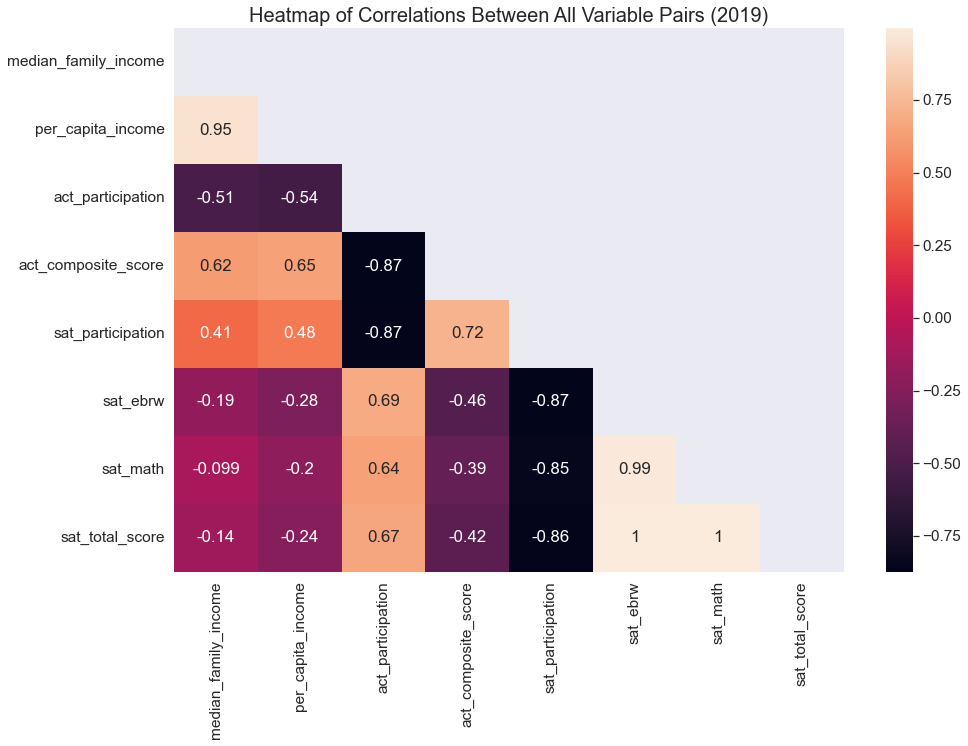

In [40]:
# heatmap to better visualize correlations
mask = np.triu(merged.corr())
sns.set(font_scale=1.4) # Make sure words are readable
plt.figure(figsize=(15, 10)) # Adjust the size
plt.title("Heatmap of Correlations Between All Variable Pairs (2019)", fontsize = 20) # Add title
sns.heatmap(merged.corr(),annot=True, mask=mask) 

*interpretation*:

* strong negative correlation observed between sat_total_score and sat_participation (r = -0.86)
* strong negative correlation observed between act_composite_score and act_participation (r = -0.87)
* moderate correlation observed between median_family_income and act_composite_score (r = 0.62)
* moderate negative correlation observed between median_family_income and act_participation (r = -0.51)
* strong negative correlation observed between act_participation and sat_participation (r = -0.87)

### ACT Scores

In [41]:
# sort by median_family_income for act participation and act composite score
merged[
    ['state', 
     'median_family_income', 
     'act_composite_score', 
     'act_participation']
    ].sort_values('median_family_income', ascending = True).tail(10)

,state,median_family_income,act_composite_score,act_participation
23,Minnesota,89842,21.4,0.95
46,Virginia,90141,24.0,0.21
1,Alaska,92588,20.1,0.38
11,Hawaii,94982,19.0,0.80
29,New Hampshire,95244,25.0,0.14
6,Connecticut,100418,25.5,0.22
30,New Jersey,102260,24.2,0.25
20,Maryland,103108,22.3,0.28
21,Massachusetts,103126,25.5,0.21
8,District of Columbia,113561,23.5,0.32


*Observations*: A preliminary glance at the sorted data reveals a possible trend between state median family income and ACT composite score.
Lower participation rates might also be negatively correlated to higher scores, possibly due to bias. i.e. those who take the ACTs in these low participation states are confident of their abilities and reasons for attempting these tests, leading to better scores.

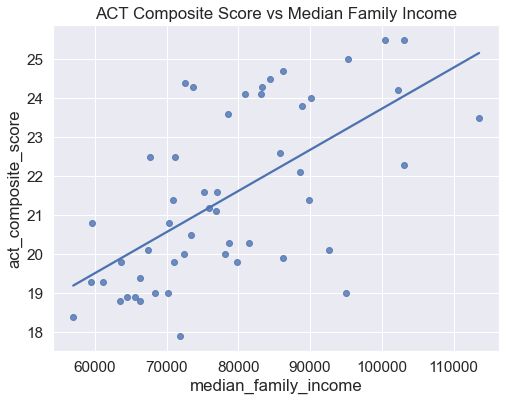

In [42]:
x = merged['median_family_income']
y = merged['act_composite_score']

fig, ax1 = plt.subplots(1, 1, figsize=(8,6))

title1 = "ACT Composite Score vs Median Family Income"
create_scatterplot(title1, x, y, 'Median family income', 'ACT composite score', ax = ax1)

*Interpretation:
State ACT composite score increases as state median family income increases. This supports the argument that wealth has a positive influence on ACT test scores, and there might be some issues with fairness.*

### SAT Scores

In [43]:
# sort by median family income for SAT participation and SAT total score
merged[
    ['state', 
     'median_family_income', 
     'sat_total_score', 
     'sat_participation']
    ].sort_values('median_family_income', ascending = True).head(10)

,state,median_family_income,sat_total_score,sat_participation
24,Mississippi,57008,1237,0.03
3,Arkansas,59455,1141,0.06
48,West Virginia,59607,943,0.99
31,New Mexico,61102,1073,0.18
18,Louisiana,63572,1200,0.05
17,Kentucky,63684,1232,0.04
0,Alabama,64430,1143,0.07
36,Oklahoma,65544,963,0.22
42,Tennessee,66242,1220,0.07
40,South Carolina,66357,1030,0.68


*Observations*:
No obvious trend can be seen between median family income and SAT total score, but once again lower participation rates seem to be negatively correlated with SAT total score. This is likely due to the same reasoning as with states with smaller ACT participation rates.

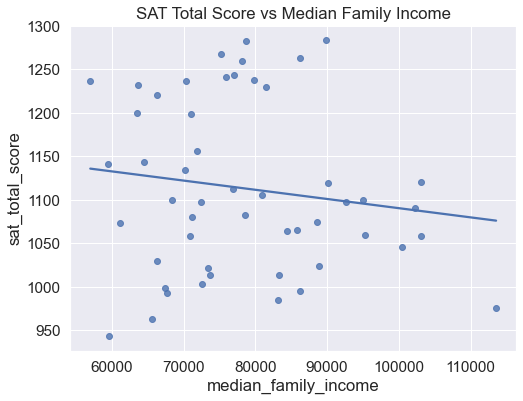

In [44]:
x = merged['median_family_income']
y = merged['sat_total_score']

fig, ax1 = plt.subplots(1, 1, figsize=(8,6))

title1 = "SAT Total Score vs Median Family Income"
create_scatterplot(title1, x, y, 'Median family income', 'SAT total score', ax = ax1)

### Participation Rates

<AxesSubplot:title={'center':'Distribution of SAT Composite Scores'}, xlabel='Score', ylabel='Count'>

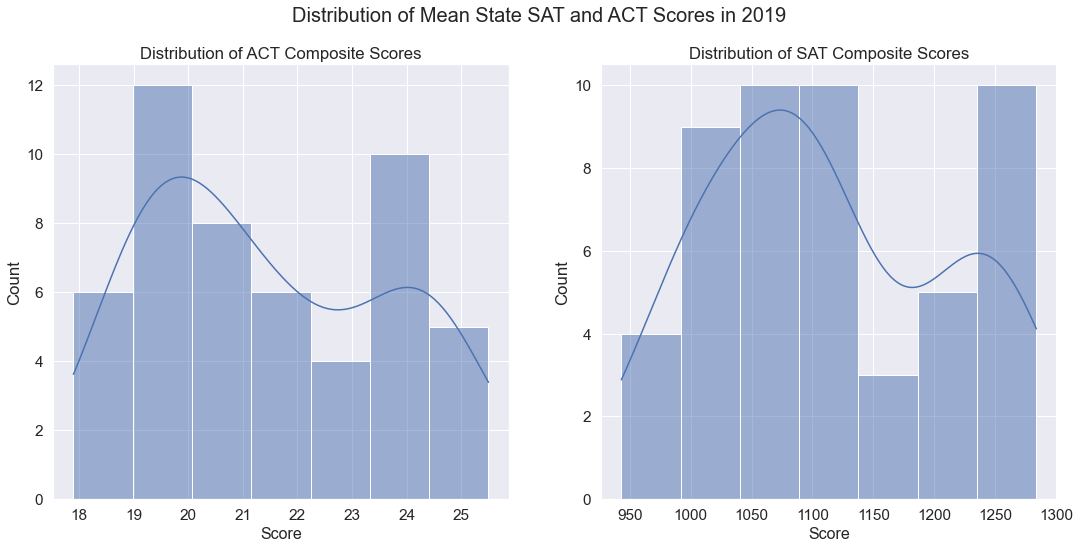

In [45]:
# Histograms illustrating distribution of test scores in 2019
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
fig.suptitle('Distribution of Mean State SAT and ACT Scores in 2019', fontsize = 20)

axes[0].set_title('Distribution of ACT Composite Scores')
axes[0].set_xlabel("Score", fontsize = 16)

axes[1].set_title('Distribution of SAT Composite Scores')
axes[1].set_xlabel("Score", fontsize = 16)

sns.histplot(ax = axes[0], data = merged.act_composite_score, kde=True)
sns.histplot(data = merged.sat_total_score, kde=True)

Text(0.5, 1.0, 'Bar Chart of ACT and SAT Participation Rates in Each State')

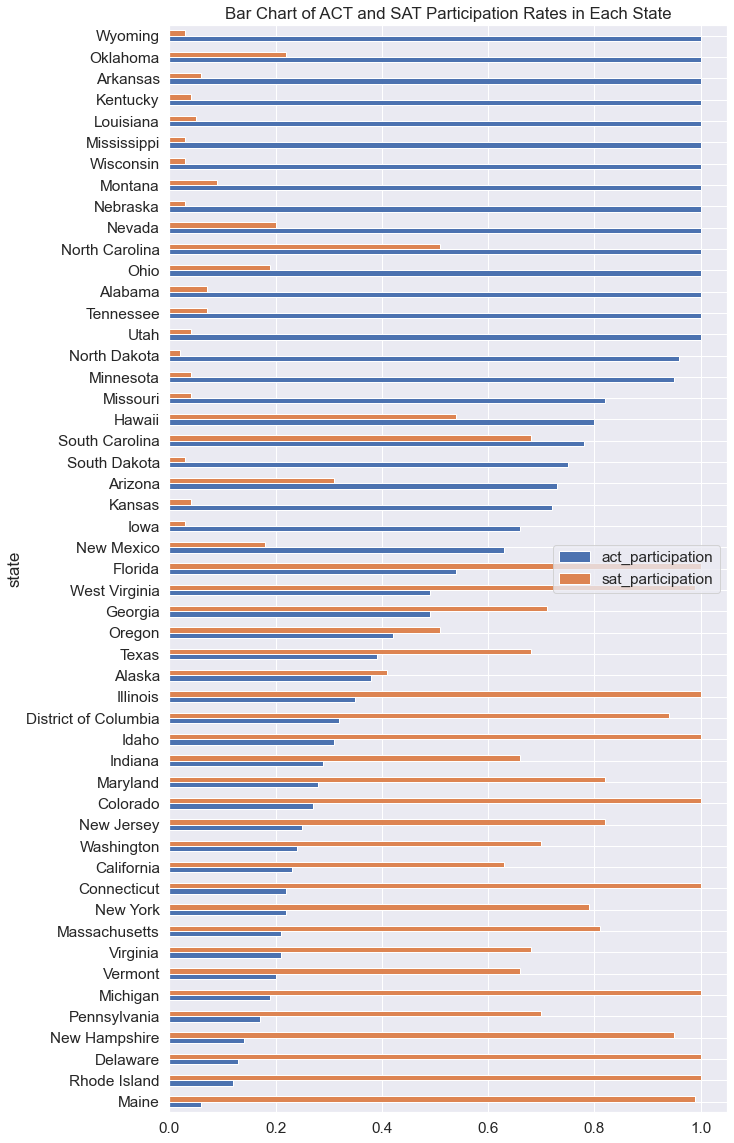

In [46]:
# bar chart showing particpation of ACT vs SAT in each state
merged.sort_values('act_participation').plot(x="state", y=["act_participation", "sat_participation"], kind = "barh", figsize = (10,20))
plt.title('Bar Chart of ACT and SAT Participation Rates in Each State')

*Interpretation: Most states have a much higher participation rate in one test as opposed to the other. Only a few states have > 50% participation rates for both tests. An interesting observation but there does not seem to be a pattern between the states with more even participation rates and their median family incomes. Sadly, this does not help in answering the problem statement but may support other trends and inform recommendations*

*Interpretation: The above chart shows that there is no visible trend between SAT total score and median family income. States with higher median income can have SAT scores than those with lower median incomes, suggesting that SAT scores might actually be a more equitable measure of aptitude that is less influenced by wealth.*

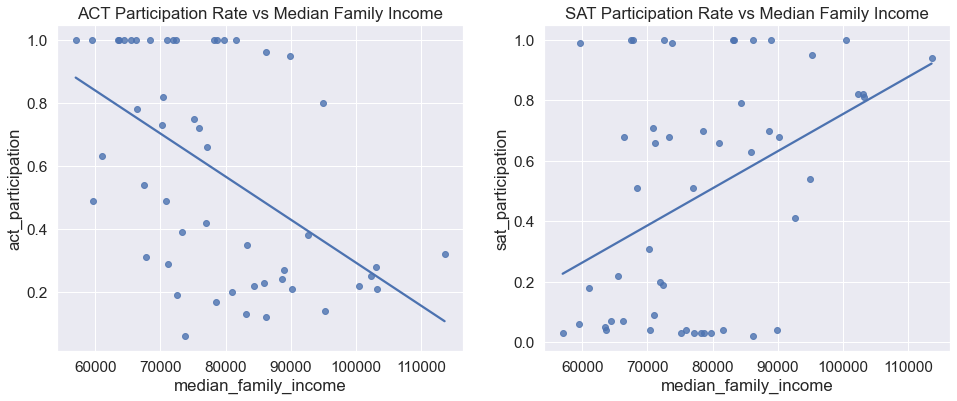

In [47]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,6))

x = merged['median_family_income']
y1 = merged['act_participation']
title1 = "ACT Participation Rate vs Median Family Income"
create_scatterplot(title1, x, y1, 'Median family income', 'ACT participation rate', ax = ax1)

y2 = merged['sat_participation']
title2 = "SAT Participation Rate vs Median Family Income"
create_scatterplot(title2, x, y2, 'Median family income', 'SAT participation rate', ax = ax2)

*Interpretation: Lastly, we look at participation rates for both tests in relation to state median family income. At first glance, a relationship is not immediately obvious, but removing the states where ACT or SAT participation alone is a graduation requirement (100% participation rate in that test), States with higher median family income appear to lean more towards the SATs.*

## Conclusions and Recommendations

### Key takeaways

The data suggests that wealthier states have higher mean ACT composite scores, while no such relationship is seen with SAT total scores. This could serve as a starting point to re-evaluate the validity of the ACT in being an objective measure of academic aptitude or find interventions to uplift lower median income states.

Of note is also the fact that ACT participation is higher with lower state median family income, which means overhauling the way schools approach the ACT could have greater impact. While it is way more difficult to tackle income disparity to level the playing field in the short run, better basic test preparation for the ACT can be implemented in schools within a shorter time frame as a means to bridge the resource gap. Learning points could be picked up from the Chinese GaoKao, a nationwide standardized test used for college admissions in China. There, the final year of high school is often devoted to preparations.

While standardized testing may not exactly be the fairest of measures, neither are other college admission criteria. Coming from a wealthier family is likely to provide more opportunities for extracurricular activities, relevant work opportunities, and volunteering experiences as well.

Back in 2014, the College Board reviewed and overhauled the SAT tests. Data back then showed a positive correlation between students' household incomes and SAT test scores. Perhaps the overhaul had its intended effect, making the SATs a much more equitable measure of aptitude based on 2019 data. Colleges should thus consider using the SAT as a part of its admissions criteria.


### Limitation and future analyses

Based on both an examination of the data and a review of state college entrance exam testing policy, it is clear that participation in such tests is heavily influenced by state policy towards testing. Most states mandate either one of the two tests and a strong negative relationship between test participation and average test score was found. This means that states with low participation rates for a given test are likely to see higher average scores than a state with high participation rates on that same test, making the comparison of average scores among states with large participation rate differences potentially problematic.

Additional data is definitely required to further refine the analysis. Due to differences in state standardized testing requirements, income data for various districts wihin a single state might be useful to compare with average scores in those districts as well, controlling for differing state policies. 